In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt
from IPython.display import HTML

In [41]:
BATCH_SIZE = 48
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\thari\Documents\tomato_disease\training\PlantVillage',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [13]:
class_names=dataset.class_names

In [14]:
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [15]:
len(dataset)

334

In [17]:
334*48

16032

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(48, 256, 256, 3)
[7 2 2 6 7 2 7 2 3 2 7 5 7 1 0 1 0 2 0 9 8 7 6 6 5 9 4 9 2 9 7 5 4 4 5 6 1
 5 4 3 6 5 0 5 5 3 1 7]


In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


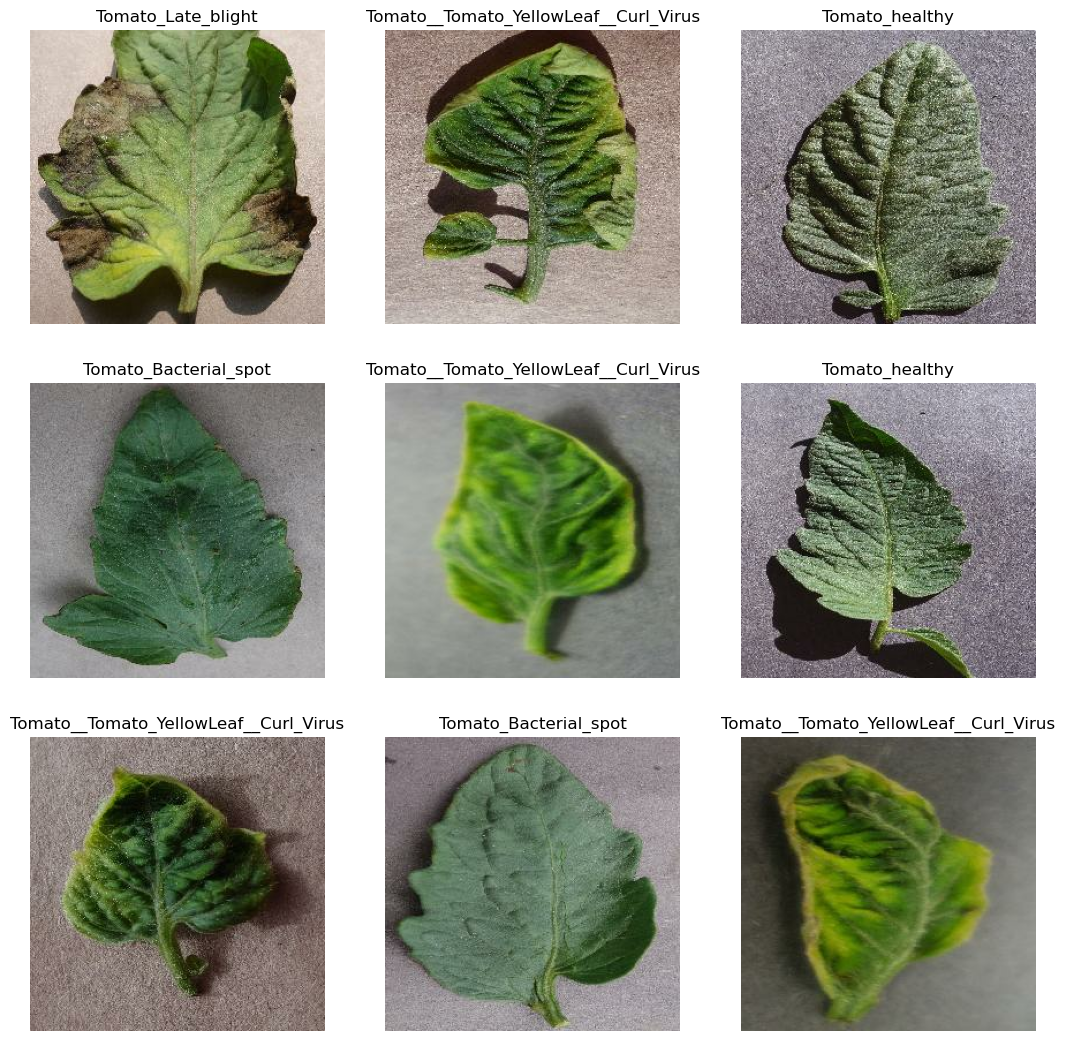

In [23]:
#visualize
plt.figure(figsize=(13,13))
for image_batch, labels_batch in dataset.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    #print(image_batch[0].shape)
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")


In [24]:
train_size=0.8
len(dataset)*train_size

267.2

In [25]:
#we can take 267 samples each batch size is 48
train_ds=dataset.take(267)
len(train_ds)

267

In [26]:
rem_ds=dataset.skip(267)
len(rem_ds)

67

In [27]:
val_size=0.1
len(dataset)*val_size

33.4

In [28]:
val_ds=rem_ds.take(33)
len(val_ds)

33

In [29]:
test_ds=rem_ds.skip(33)
len(test_ds)

34

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

267

In [33]:
len(val_ds)

33

In [34]:
len(test_ds)

34

In [35]:
#this will take the img from dist and next time we want to use it, it will store in the memory
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [40]:
#resize_and_rescale = tf.keras.Sequential([
  #layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  #layers.experimental.preprocessing.Rescaling(1./255),
#])

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [44]:
#data_augmentation = tf.keras.Sequential([
  #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  #layers.experimental.preprocessing.RandomRotation(0.2),
#])
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [45]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [50]:
n_classes=10
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [51]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (48, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (48, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (48, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (48, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (48, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (48, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (48, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (48, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (48, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (48, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (48, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (48, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (48, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (48, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (48, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (48, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=1,
)

267/267 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.3111 - loss: 1.8855 - val_accuracy: 0.6869 - val_loss: 0.9047


In [54]:
score=model.evaluate(test_ds)
score

34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 298ms/step - accuracy: 0.6805 - loss: 0.8836


[0.9040244221687317, 0.6759776473045349]

first image to predict
actual label: Tomato_Bacterial_spot
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
predicted label: Tomato_Bacterial_spot


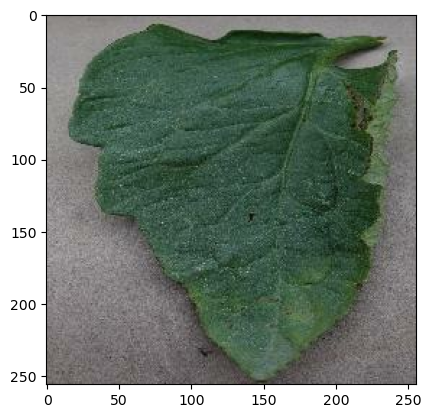

In [56]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


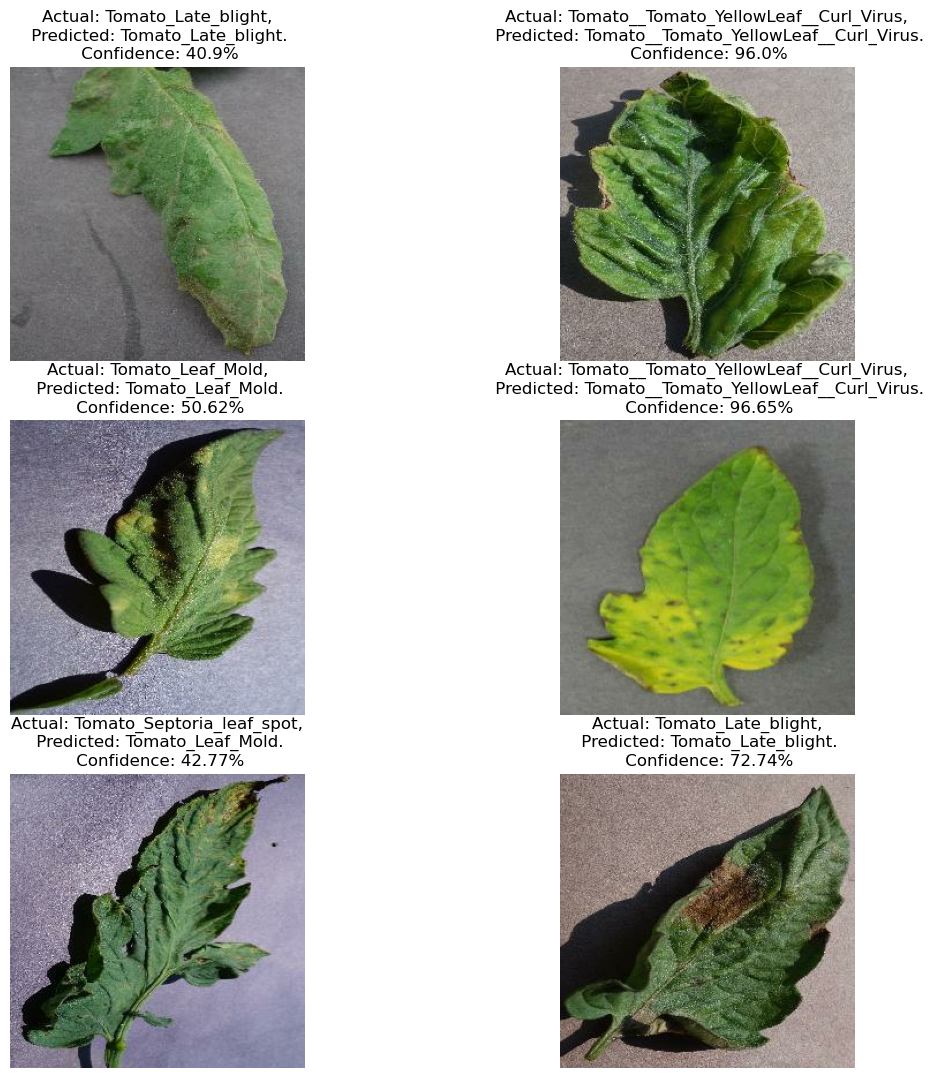

In [64]:
plt.figure(figsize=(13,13))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3,2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [72]:
model_version=1
model_save_path = f'C:/Users/thari/Documents/tomato_disease/saved_model/m{model_version}.keras'
model.save(model_save_path)

In [73]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install uvicorn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install python-multipart


  Obtaining dependency information for python-multipart from https://files.pythonhosted.org/packages/3d/47/444768600d9e0ebc82f8e347775d24aef8f6348cf00e9fa0e81910814e6d/python_multipart-0.0.9-py3-none-any.whl.metadata


In [76]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install tensorflow-serving-api

  Obtaining dependency information for tensorflow-serving-api from https://files.pythonhosted.org/packages/f6/6a/6e91fbca9593663edc368df59a5d57e5549048530ba42c6833b560e30cba/tensorflow_serving_api-2.16.1-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [60]:
%cd /content/drive/MyDrive/potato_disease/api/


/content/drive/MyDrive/potato_disease/api


In [72]:
!python main.py

INFO:     Started server process [75886]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [75886]
Traceback (most recent call last):
  File "/content/drive/MyDrive/potato_disease/api/main.py", line 12, in <module>
    uvicorn.run(app, host= "127.0.0.1", port=8000)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 577, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "uvloop/loop.pyx", line 1511, in uvloop.loop.Loop.run_until_complete
  File "uvloop/loop.pyx", line 1504, in uvloop.loop.Loop.run_until

In [74]:
pip install pyngrok

In [77]:
from pyngrok import ngrok
import uvicorn

# Start Uvicorn server in the background
uvicorn_config = {
    "app": "main:app",
    "host": "127.0.0.1",
    "port": 8000,
    "reload": True,
}

uvicorn_server = uvicorn.Server(uvicorn_config)
uvicorn_process = uvicorn_server.run_in_thread()

# Establish tunnel with ngrok
public_url = ngrok.connect(port=uvicorn_config["port"])
print("Public URL:", public_url)

try:
    # Keep the notebook running
    input("Press Enter to stop...\n")
finally:
    # Stop the Uvicorn server
    uvicorn_process.safe_shutdown()


AttributeError: 'Server' object has no attribute 'run_in_thread'

In [75]:
!uvicorn main:app --reload

INFO:     Will watch for changes in these directories: ['/content/drive/MyDrive/potato_disease/api']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [76837] using WatchFiles
INFO:     Started server process [76843]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [76843]
INFO:     Stopping reloader process [76837]
